## Exercise
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

## 1 )

<class 'numpy.ndarray'> (700, 700, 3)


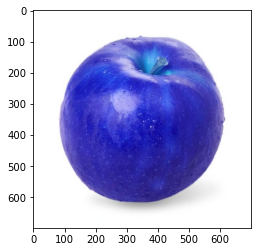

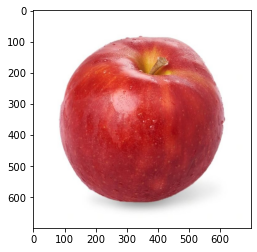

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('apple_handin2.jpg')   # Read the image
print(type(img),img.shape)
plt.imshow(img)   # Ploting the image using matplotlib
plt.figure()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## 2 )

(700, 700)


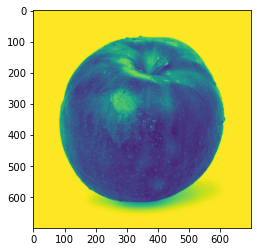

In [2]:
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_grey.shape)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_grey)

thresh = 200 # the lower the threshhold the more details we get
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
# 4
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


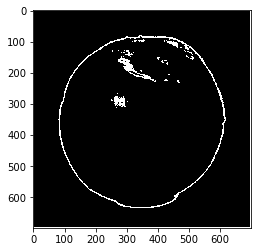

In [3]:
img_contours = np.zeros(img.shape)
cv2.drawContours(img_contours, contours, -1, (255,255,255), 3)
plt.imshow(img_contours, interpolation='none')

## 3 )

Image shape (700, 700, 3) Thresh (700, 700) [  0 254 255]


<Figure size 432x288 with 0 Axes>

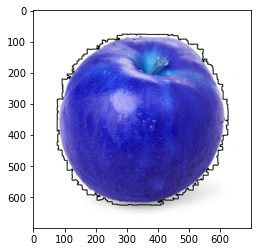

<Figure size 432x288 with 0 Axes>

In [4]:
# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

There are 1 cards


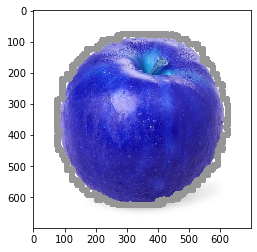

In [5]:
im2 = img.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (150, 150, 150), 20)

plt.imshow(im2, interpolation='none')
print(f'There are {count} cards')

## 4 )

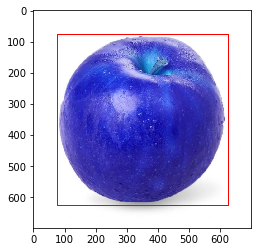

In [6]:
boxes = []
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    boxes.append([x,y, x+w,y+h])

boxes = np.asarray(boxes)
left, top = np.min(boxes, axis=0)[:2]
right, bottom = np.max(boxes, axis=0)[2:]

cv2.rectangle(img, (left,top), (right,bottom), (255, 0, 0), 2)
plt.imshow(img, interpolation='none')

## 5 ) 

<class 'numpy.ndarray'> (360, 668, 3)


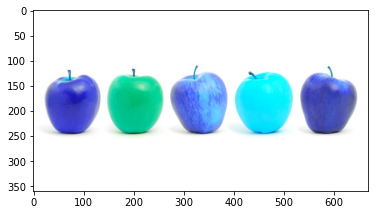

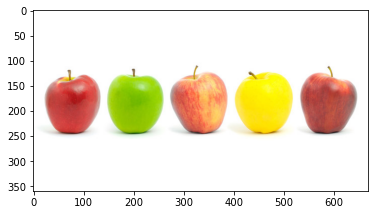

In [7]:
img = cv2.imread('apple_multiple_handin.jpg')
print(type(img),img.shape)
plt.imshow(img)   # Ploting the image using matplotlib
plt.figure()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## 6 )

Image shape (360, 668, 3) Thresh (360, 668) [  0 254 255]
There are 5 apples


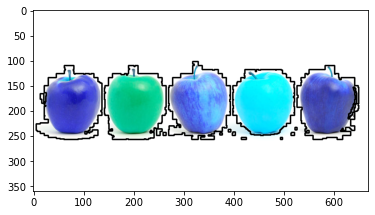

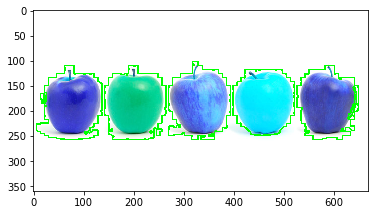

In [9]:
# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print(f'There are {count} apples')